In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import matplotlib.dates as mdates
import sympy as sp
from scipy.optimize import curve_fit
import datetime as datetime
import statistics as stat
Fmt = mdates.DateFormatter('%H%M%S')
%matplotlib widget

In [2]:
loaddirectory = '..\\data\\20231107_alignment\\'
filename = 'AllCloser20231107_093246_10.310.npy'
data = np.load(loaddirectory+filename, allow_pickle = True)
newdata=np.transpose(data)
x1,x2,x3,c,l, v, time, d = newdata

In [3]:
x_mean = []
for i in range(len(x1)):
    # mean pos from strain gauges
    x_mean.append(stat.mean([x1[i], x2[i], x3[i]]))

In [4]:
x_s = []
for i in range(len(x_mean)):
    #get real distance in m from strain gauge
    x_s.append(np.array(x_mean[i])*0.0875*10**(-3))

In [33]:
x_s

[0.00033271469771416364,
 0.00033294167912839134,
 0.00033208716086306344,
 0.000331259346293527,
 0.00033039147618030333,
 0.00032949690237128813,
 0.00032860232856227303,
 0.00032769440290536213,
 0.0003268131809442427,
 0.0003259319589831232,
 0.0003250640888698996,
 0.0003242229224524674,
 0.0003233550523392437,
 0.0003225005340739158,
 0.0003216059602649006,
 0.00032076479384746847,
 0.000320043794061098,
 0.00032092501602221747,
 0.00032180623798333687,
 0.00032262070070497757,
 0.0003235152745139928,
 0.0003244232001709037,
 0.0003251976073488571,
 0.0003260654774620808,
 0.0003269734031189916,
 0.0003278813287759026,
 0.00032872249519333473,
 0.00032963042085024563,
 0.00033047158726767783,
 0.00033129940183721423,
 0.0003322340311899167,
 0.00033296838282418284,
 0.0003320738090151677,
 0.00033116588335825673,
 0.00033029801324503314,
 0.0003294701986754967,
 0.00032860232856227303,
 0.0003277344584490494,
 0.0003268131809442427,
 0.0003259586626789147,
 0.0003251041444135868,

In [6]:
d

array([1.0401121903153153e-05, 1.143624361553939e-05,
       1.2519412063707217e-05, 1.3582641544117646e-05,
       1.463159801980198e-05, 1.577488684884714e-05,
       1.683133712984055e-05, 1.7890937046004842e-05,
       1.8960628688734923e-05, 2.0056886536373506e-05,
       2.1111305714285716e-05, 2.2169087908790877e-05,
       2.326497795969773e-05, 2.4345822075782537e-05,
       2.5426555402615277e-05, 2.6502715208034433e-05,
       2.543530808950086e-05, 2.4383582483582486e-05,
       2.3306806926789266e-05, 2.2269981012085957e-05,
       2.1235686161804857e-05, 2.0166367358078605e-05,
       1.910772433410913e-05, 1.8078285868075944e-05,
       1.699353050757802e-05, 1.5908362219303723e-05,
       1.4829223111967408e-05, 1.3735397341760385e-05,
       1.268926154902971e-05, 1.1614204652624961e-05,
       1.0556406886206159e-05, 1.1616030498349316e-05,
       1.2656658102089758e-05, 1.3693396960711637e-05,
       1.4786786071642986e-05, 1.5856130901287553e-05,
       1.6919983970

In [ ]:
# Define the number of points to group by color
points_per_color = 15
num_points = len(df_phi)

# Generate a list of colors to cycle through
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink', 'purple', 'hotpink', 'midnightblue']

for i in range(0, num_points, points_per_color):
    subset = df_phi.iloc[i:i + points_per_color]
    color = colors[i // points_per_color % len(colors)]  # Calculate the color for this subset
    plt.plot(subset['angle'], subset['c'], '.', label=f'Points {i+1}-{i+points_per_color}', color=color)
# plt.plot(df_phi['angle'], df_phi['c'], '.')
plt.xlabel('phi[rad]')
plt.ylabel('C[F]')
plt.show()

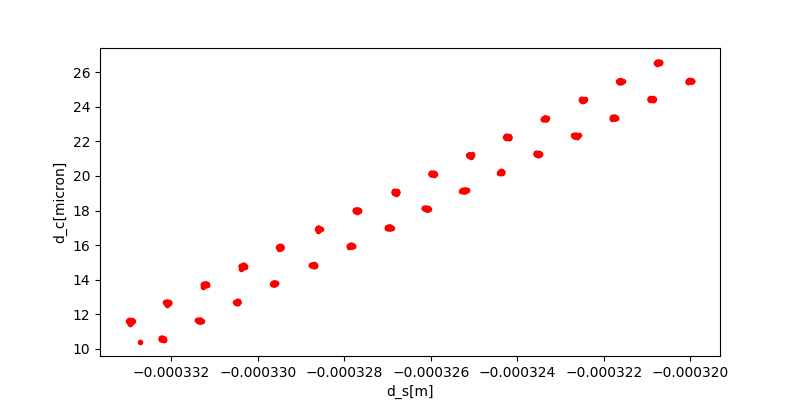

In [37]:
plt.figure(10, figsize=(8,4))


plt.plot(-np.array(x_s), d*10**6, '.', color = color)
plt.xlabel('d_s[m]')
plt.ylabel('d_c[micron]')
plt.show()

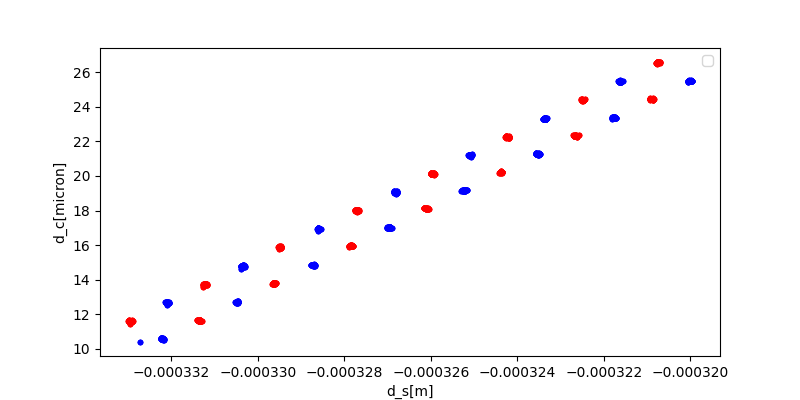

In [39]:
x_even = x_s[::2]  # Every second point
d_even = d[::2]

x_odd = x_s[1::2]  # Remaining points
d_odd = d[1::2]

# Create a figure and plot the data
plt.figure(9, figsize=(8, 4))

# Plot every second point in one color
plt.plot(-np.array(x_even), d_even*10**6, '.', color='blue')

# Plot the remaining points in another color
plt.plot(-np.array(x_odd), d_odd*10**6, '.', color='red')

plt.xlabel('d_s[m]')
plt.ylabel('d_c[micron]')
plt.show()

In [21]:
d_even, x_even

(array([1.0401121903153153e-05, 1.2519412063707217e-05,
        1.463159801980198e-05, 1.683133712984055e-05,
        1.8960628688734923e-05, 2.1111305714285716e-05,
        2.326497795969773e-05, 2.5426555402615277e-05,
        2.543530808950086e-05, 2.3306806926789266e-05,
        2.1235686161804857e-05, 1.910772433410913e-05,
        1.699353050757802e-05, 1.4829223111967408e-05,
        1.268926154902971e-05, 1.0556406886206159e-05,
        1.2656658102089758e-05, 1.4786786071642986e-05,
        1.6919983970689262e-05, 1.9073198244708313e-05,
        2.1208257749712975e-05, 2.33237279040404e-05,
        2.5470379179593243e-05, 2.5487951017592274e-05,
        2.337537804492249e-05, 2.1299962525223408e-05,
        1.916720363164721e-05, 1.7029170315740954e-05,
        1.4864125930396297e-05, 1.273080117160579e-05,
        1.0591209058983733e-05, 1.2696675029211629e-05,
        1.4791226103493145e-05, 1.6966606199770377e-05,
        1.909044567885286e-05, 2.1226535478310828e-05,
     

In [26]:
diff_d1 = []
# substract subsequent points of each list
for i in range(34):
    diff_d1.append(d_even[i]-d_even[i+15])
    

In [27]:
d_even[0], d_even[15], diff_d1


(1.0401121903153153e-05,
 1.0556406886206159e-05,
 [-1.5528498305300591e-07,
  -1.372460383825409e-07,
  -1.5518805184100522e-07,
  -8.864684084871258e-08,
  -1.1256955597339013e-07,
  -9.695203542725935e-08,
  -5.8749944342671284e-08,
  -4.382377697796663e-08,
  -5.26429280914135e-08,
  -6.8571118133224e-08,
  -6.427636341855062e-08,
  -5.947929753808085e-08,
  -3.5639808162934105e-08,
  -3.490281842888934e-08,
  -4.153962257608012e-08,
  -3.480217277757446e-08,
  -4.0016927121870816e-08,
  -4.440031850158881e-09,
  -4.6622229081115014e-08,
  -1.7247434144547372e-08,
  -1.8277728597852787e-08,
  -5.891317985358478e-09,
  -5.278835063128183e-08,
  -3.5216512632250664e-08,
  -1.331846052192475e-08,
  1.5339163564179382e-08,
  -3.436857281733001e-08,
  -1.5713190602761673e-08,
  -8.971045887149419e-10,
  -2.1938309790815903e-09,
  -2.02296473581771e-08,
  -5.674979383865782e-09,
  -1.9270990112790038e-08,
  2.140037475030962e-08])

In [28]:
max(diff_d1)*1e6

0.02140037475030962

In [31]:
diff_d2 = []
# substract subsequent points of each list
for i in range(34):
    diff_d2.append(d_odd[i]-d_odd[i+15])

In [32]:
max(diff_d2)*1e6

0.044918596085829314